# Unsupervised Learning 1 Workshop

## Loading the data

In [1]:
#ipython magic command so our plots get shown in the workbook
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
boston = load_boston()
list(boston)

['data', 'target', 'feature_names', 'DESCR']

In [2]:
print(boston['DESCR']) # need to say print for correct formatting

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Q: What is the variable we want to predict in this dataset?
- A: From the description we can see that Median Value is usually the target variable of this datset.

In [3]:
all_data = pd.DataFrame(boston.data)
display(all_data.head(5)) # Show the first 10 rows of the dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
all_data.columns = boston.feature_names
all_data['MEDV'] = boston.target
display(all_data.head(5))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Describing the data

There's a lot of variables here, so for now we're just going to look at a few that could of be interest.

In [5]:
data = all_data[['MEDV', 'CRIM', 'RM', 'PTRATIO']].copy()
display(data.head(5))

,MEDV,CRIM,RM,PTRATIO
0,24.0,0.00632,6.575,15.3
1,21.6,0.02731,6.421,17.8
2,34.7,0.02729,7.185,17.8
3,33.4,0.03237,6.998,18.7
4,36.2,0.06905,7.147,18.7


A histogram is plot showing us how many observations occur in each range of values.

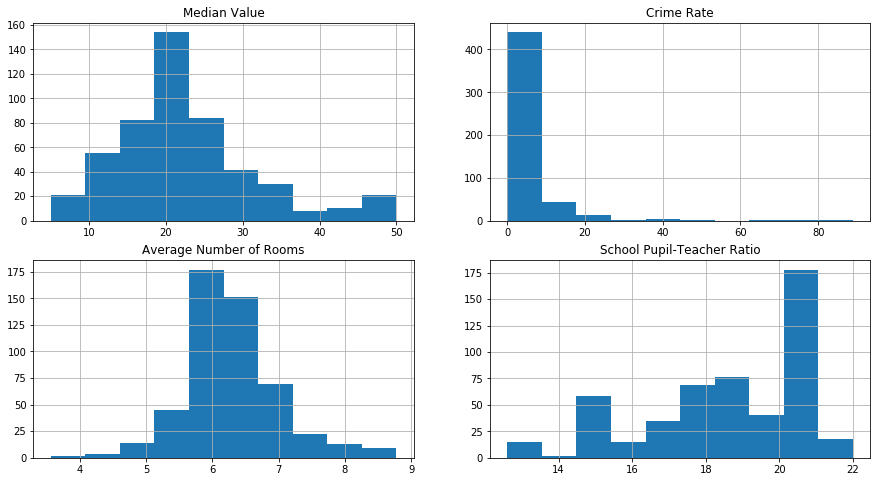

In [6]:
# Use semicolons to supress printing of the plot object
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2, figsize = (15, 8));

axis1.set_title("Median Value")
axis2.set_title("Crime Rate")
axis3.set_title("Average Number of Rooms")
axis4.set_title("School Pupil-Teacher Ratio")

data['MEDV'].hist(ax = axis1);
data['CRIM'].hist(ax = axis2);
data['RM'].hist(ax = axis3);
data['PTRATIO'].hist(ax = axis4);

- Q: Are any of these distributions potential problematic? If so, what can we do about this?
- A: Crime Rate has a strong positive skew. By taking the logarithm, we can transform it into a more normally distributed shape. Logically, this makes sense - We're more interested in if crime rates double, than if all crimes rates increase by some value.

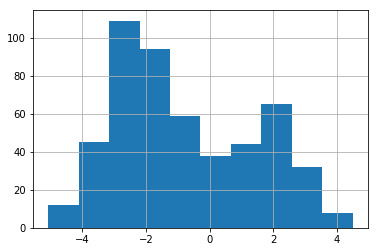

In [7]:
data['CRIM'] = np.log(data['CRIM'])
data['CRIM'].hist();

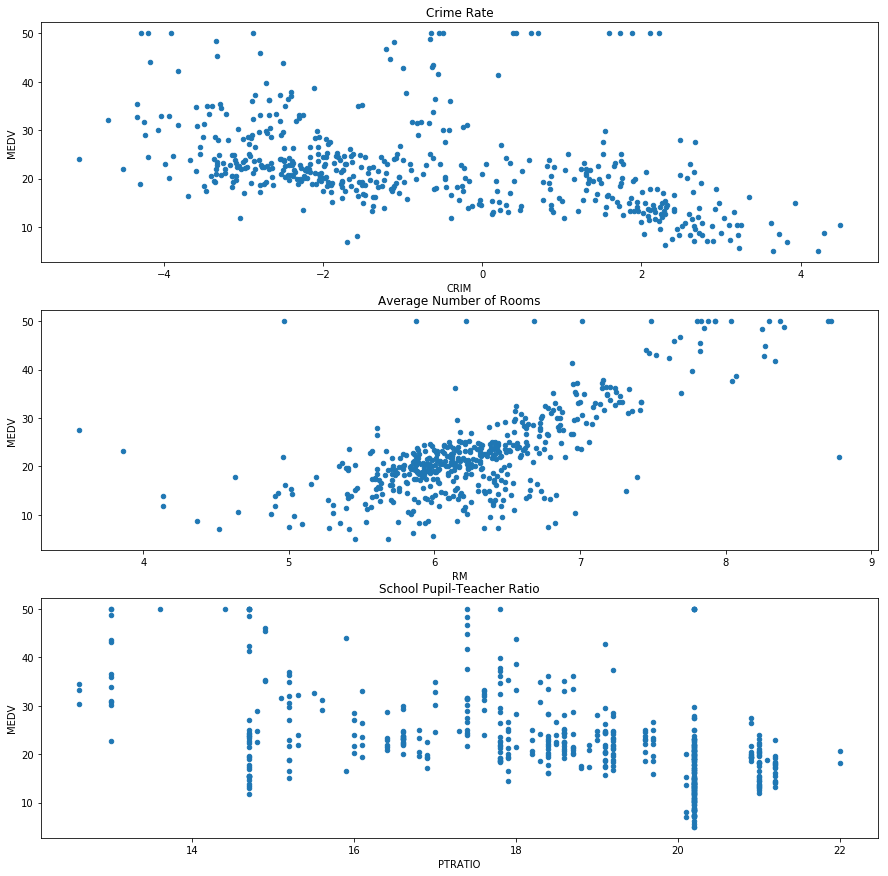

In [14]:
# Use semicolons to supress printing of the plot object
fig, (axis1, axis2, axis3) = plt.subplots(3, 1, figsize = (15, 15));

axis1.set_title("Crime Rate")
axis2.set_title("Average Number of Rooms")
axis3.set_title("School Pupil-Teacher Ratio")

data.plot.scatter('CRIM', 'MEDV', ax = axis1); # change to all_data to see how the log transform helped us
data.plot.scatter('RM', 'MEDV', ax = axis2);
data.plot.scatter('PTRATIO', 'MEDV', ax = axis3);

## Regression

Formalise the question we are trying to answer (see lecture notes)

### Linear Regression
A linear model for a dependent variable y is a linear combination of explanatory variables X.

In [65]:
X = data.drop('MEDV', axis = 1)
Y = data['MEDV']

from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

In [ ]:
lm = LinearRegression()
lm.fit(X, Y)

- Q: What are the advantages of linear regression?
- A: Easy to fit. Low computational power and low memory footprint. Easy to interpret.
- Q: Disadvantages?
- A: Strong assumptions about data. Sensitive to outliers.

### Validation
- Q: How can we check the performance of our model? 
- A: We can't - we've used all the data available in fitting the model, so if we use any of that data to test the model, it's going to perform much better than on unseen data.
- Q: What's a risk of this?
- A: Overfitting - when you get a really good fit to the data, but not to new data. Bias - Variance tradeoff! 

In [25]:
 # We need hold back some data to check again - called cross validation.
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [34]:
# Fit the model again and make some predictions for the test set.
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

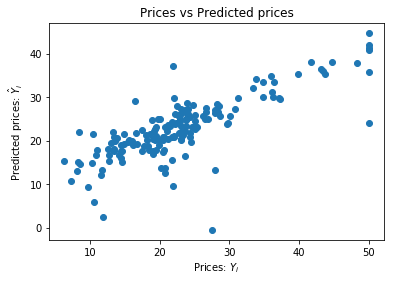

In [35]:
plt.scatter(Y_test, Y_pred);
plt.xlabel("Prices: $Y_i$");
plt.ylabel("Predicted prices: $\hat{Y}_i$");
plt.title("Prices vs Predicted prices");

In [39]:
# Way of quantifying the fit? Correlation coefficient (measure of linearity)
lm.score(X_test, Y_test)

0.62472846027496221

In [64]:
from sklearn.neighbors import KNeighborsRegressor
help(KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors.regression:

class KNeighborsRegressor(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedFloatMixin, sklearn.base.RegressorMixin)
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |    

In [ ]:
knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(X_train, Y_train)
Y_pred = knr.predict(X_test)

0.6901950958


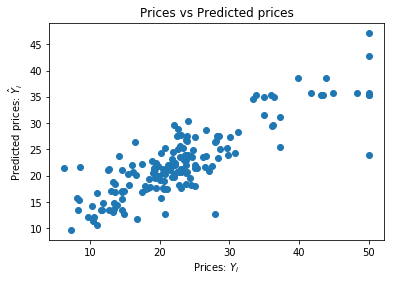

In [46]:
plt.scatter(Y_test, Y_pred);
plt.xlabel("Prices: $Y_i$");
plt.ylabel("Predicted prices: $\hat{Y}_i$");
plt.title("Prices vs Predicted prices");

print(knr.score(X_test, Y_test))

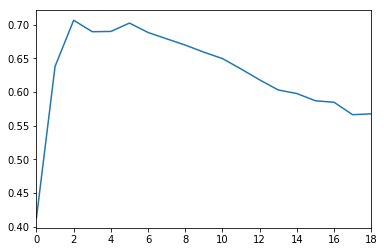

In [55]:
scores = []
for i in range(1, 20):
    knr = KNeighborsRegressor(n_neighbors = i)
    knr.fit(X_train, Y_train)
    scores.append(knr.score(X_test, Y_test))
    
scores = pd.Series(scores)
scores.plot();

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(1,10), 'weights':['uniform', 'distance']}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters)
clf.fit(X_train, Y_train)

print(clf.best_estimator_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='distance')
